In [2]:
# Load libraries and joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib


# Load datasets and separate target
train_df = pd.read_csv('/home/danial/Data Science/Fraud Detection/Data/splits/train.csv')
val_df   = pd.read_csv('/home/danial/Data Science/Fraud Detection/Data/splits/validation.csv')
test_df  = pd.read_csv('/home/danial/Data Science/Fraud Detection/Data/splits/test.csv')

X_val = val_df.drop('Class', axis=1)
y_val = val_df['Class']

X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']



In [3]:
# Load trained model pipelines
lr_pipeline = joblib.load('/home/danial/Data Science/Fraud Detection/Models/lr_pipeline.pkl')
dt_pipeline = joblib.load('/home/danial/Data Science/Fraud Detection/Models/dt_pipeline.pkl')


In [4]:
# Predict on validation set
y_val_pred_lr = lr_pipeline.predict(X_val)
y_val_pred_dt = dt_pipeline.predict(X_val)


In [5]:
# Compute metrics on validation
for name, y_pred in [('Logistic Regression', y_val_pred_lr), ('Decision Tree', y_val_pred_dt)]:
    print(f"\n{name} Validation Metrics:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1-Score:", f1_score(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



Logistic Regression Validation Metrics:
Accuracy: 0.9990813370079853
Precision: 0.8225806451612904
Recall: 0.6455696202531646
F1-Score: 0.723404255319149
Confusion Matrix:
 [[42363    11]
 [   28    51]]

Decision Tree Validation Metrics:
Accuracy: 0.9993875580053235
Precision: 0.7912087912087912
Recall: 0.9113924050632911
F1-Score: 0.8470588235294118
Confusion Matrix:
 [[42355    19]
 [    7    72]]


In [6]:
# Predict and evaluate on test set
y_test_pred_lr = lr_pipeline.predict(X_test)
y_test_pred_dt = dt_pipeline.predict(X_test)

for name, y_pred in [('Logistic Regression', y_test_pred_lr), ('Decision Tree', y_test_pred_dt)]:
    print(f"\n{name} Test Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Test Metrics:
Accuracy: 0.9991520033919864
Precision: 0.8620689655172413
Recall: 0.6410256410256411
F1-Score: 0.7352941176470589
Confusion Matrix:
 [[42367     8]
 [   28    50]]

Decision Tree Test Metrics:
Accuracy: 0.9994582243893246
Precision: 0.8089887640449438
Recall: 0.9230769230769231
F1-Score: 0.8622754491017964
Confusion Matrix:
 [[42358    17]
 [    6    72]]


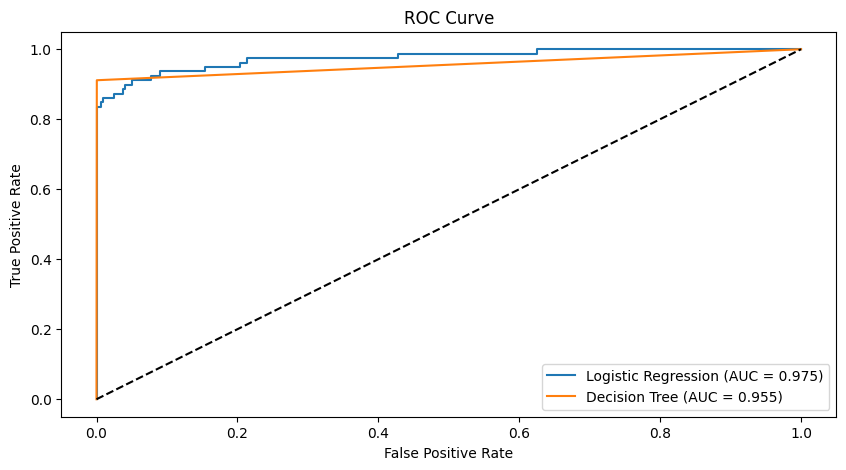

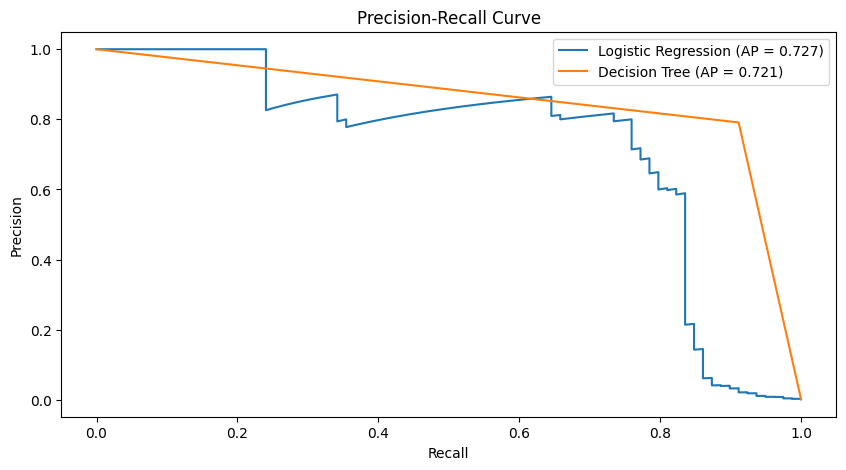

In [7]:
# Plot ROC and PR curves for Logistic Regression and Decision Tree
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Predict probabilities for positive class
y_val_prob_lr = lr_pipeline.predict_proba(X_val)[:, 1]
y_val_prob_dt = dt_pipeline.predict_proba(X_val)[:, 1]

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_val_prob_dt)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_val, y_val_prob_lr)
precision_dt, recall_dt, _ = precision_recall_curve(y_val, y_val_prob_dt)

ap_lr = average_precision_score(y_val, y_val_prob_lr)
ap_dt = average_precision_score(y_val, y_val_prob_dt)

plt.figure(figsize=(10, 5))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {ap_lr:.3f})')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AP = {ap_dt:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
